In [2]:
# must run in an environment where polarityjam is installed
from polarityjam.controller.extractor import Extractor
from polarityjam.controller.plotter import Plotter
from polarityjam.controller.segmenter import Segmenter
from polarityjam.model.collection import PropertiesCollection
from polarityjam.model.parameter import InputParameter, PlotParameter, SegmentationParameter
from polarityjam.utils.io import read_image

from pathlib import Path
import os

In [3]:
output_path = "/home/jpa/tmp/polarityjam_out/"

In [5]:
# read input
infile = "/home/jpa/tmp/polarityjam/data/golgi_nuclei/set_1/060721_EGM2_18dyn_01.tif"
fileout_name = "060721_EGM2_18dyn_01"
img = read_image(infile)

In [6]:
# define your parameters, use default values or use a yml file for it
params_input = InputParameter()
params_seg = SegmentationParameter()
params_plot = PlotParameter()

#params_input = InputParameter.from_yml(path_to_yml)

In [7]:
# look at your params to check them
print(params_input)

# set the expression marker channel
params_input.channel_expression_marker = 0

InputParameter  
	channel_junction:	0
	channel_nucleus:	1
	channel_organelle:	2
	channel_expression_marker:	-1
	membrane_thickness:	5
	feature_of_interest:	cell_area
	min_cell_size:	50
	min_nucleus_size:	10
	min_organelle_size:	10
	dp_epsilon:	5



In [8]:
# setup an extractor and prepare the image for segmentation
e = Extractor(params_input)
img_seg = e.get_image_for_segmentation(img)


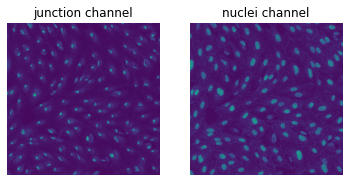

In [9]:
# Define a plotter and check your image that is prepared for segmentation
p = Plotter(params_plot)

# plot input
p.plot_seg_channels(img_seg, output_path, infile)


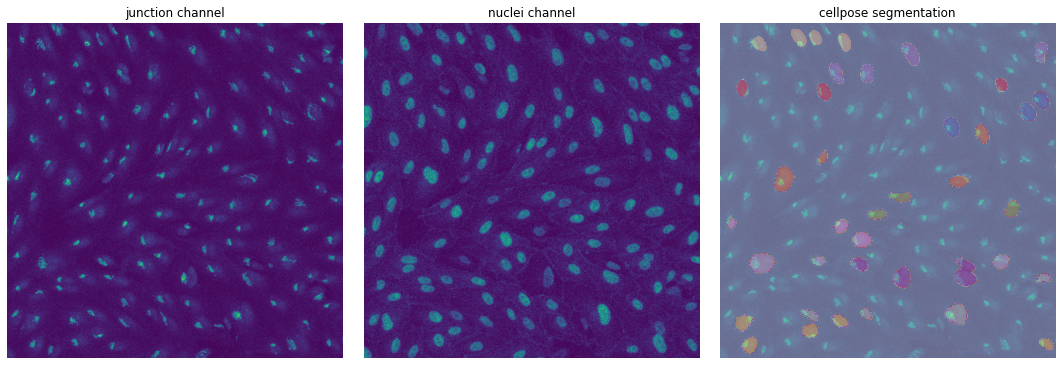

In [10]:
# Define your segmenter and segment your image
s = Segmenter(params_seg)
mask = s.load_or_get_cellpose_segmentation(img_seg, infile)

# plot cellpose mask to check the quality
p.plot_cellpose_masks(img_seg, mask, output_path, fileout_name)


In [11]:
# feature extraction
c = PropertiesCollection()
e.extract(img, mask, fileout_name, output_path, c)

/home/jpa/PycharmProjects/polarityjam/polarityjam/polarityjam/compute/moran.py:180: RuntimeWarning: invalid value encountered in double_scalars
  VIR = (A - B) / ((n - 1) * (n - 2) * (n - 3) * s02) - EI * EI
/home/jpa/PycharmProjects/polarityjam/polarityjam/polarityjam/compute/moran.py:113: RuntimeWarning: invalid value encountered in double_scalars
  self.z_norm = (self.I - self.EI) / self.seI_norm


In [12]:
c.dataset.head()

,filename,label,cell_X,cell_Y,cell_shape_orientation,cell_major_axis_length,cell_minor_axis_length,cell_eccentricity,cell_major_to_minor_ratio,cell_area,...,morans_p_norm,neighbors_cell,neighbors_mean_dif_1st,neighbors_median_dif_1st,neighbors_stddev_dif_1st,neighbors_range_dif_1st,neighbors_mean_dif_2nd,neighbors_median_dif_2nd,neighbors_stddev_dif_2nd,neighbors_range_dif_2nd
1,060721_EGM2_18dyn_01,38.0,738.843124,749.230131,2.664638,65.584929,28.409764,0.90131,2.308535,1447.0,...,NaN,1.0,1218.0,1218.0,0.0,0.0,0.0,0.0,0.0,0.0
2,060721_EGM2_18dyn_01,40.0,778.646154,747.148218,2.774722,69.149117,49.251872,0.70192,1.403990,2665.0,...,NaN,1.0,-1218.0,-1218.0,0.0,0.0,0.0,0.0,0.0,0.0
